In [22]:
#Import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

##Load and Inspect Data

In [23]:
#Download the dataset
import gdown
import shutil

file_id = "1jV6yUzWjhbIWXnpDM1Jm10wcP0BuNZhV"
output = "NASDAQ Historical Prices.zip"

gdown.download(f"https://drive.google.com/uc?export=download&id={file_id}", output, quiet=False)
shutil.unpack_archive(output, "./")

Downloading...
From: https://drive.google.com/uc?export=download&id=1jV6yUzWjhbIWXnpDM1Jm10wcP0BuNZhV
To: /content/NASDAQ Historical Prices.zip
100%|██████████| 62.6k/62.6k [00:00<00:00, 44.2MB/s]


In [24]:
#Load the dataset
file_path = 'NASDAQ Historical Prices.csv'
df = pd.read_csv(file_path)

In [25]:
#Display basic information about the dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577 entries, 0 to 2576
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2577 non-null   object 
 1   Open       2577 non-null   float64
 2   High       2577 non-null   float64
 3   Low        2577 non-null   float64
 4   Close      2577 non-null   float64
 5   Adj Close  2577 non-null   float64
 6   Volume     2577 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 141.1+ KB


,Date,Open,High,Low,Close,Adj Close,Volume
0,1/2/2014,4160.029785,4160.959961,4131.790039,4143.069824,4143.069824,1738820000
1,1/3/2014,4148.560059,4152.959961,4124.959961,4131.910156,4131.910156,1667480000
2,1/6/2014,4137.029785,4139.779785,4103.750000,4113.680176,4113.680176,2292840000
3,1/7/2014,4128.569824,4158.180176,4126.479980,4153.180176,4153.180176,2278220000
4,1/8/2014,4154.279785,4171.750000,4145.000000,4165.609863,4165.609863,2345220000


In [26]:
#Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [27]:
#set Date as index
df = df.set_index('Date')

##Exploratory Data Analysis (EDA)

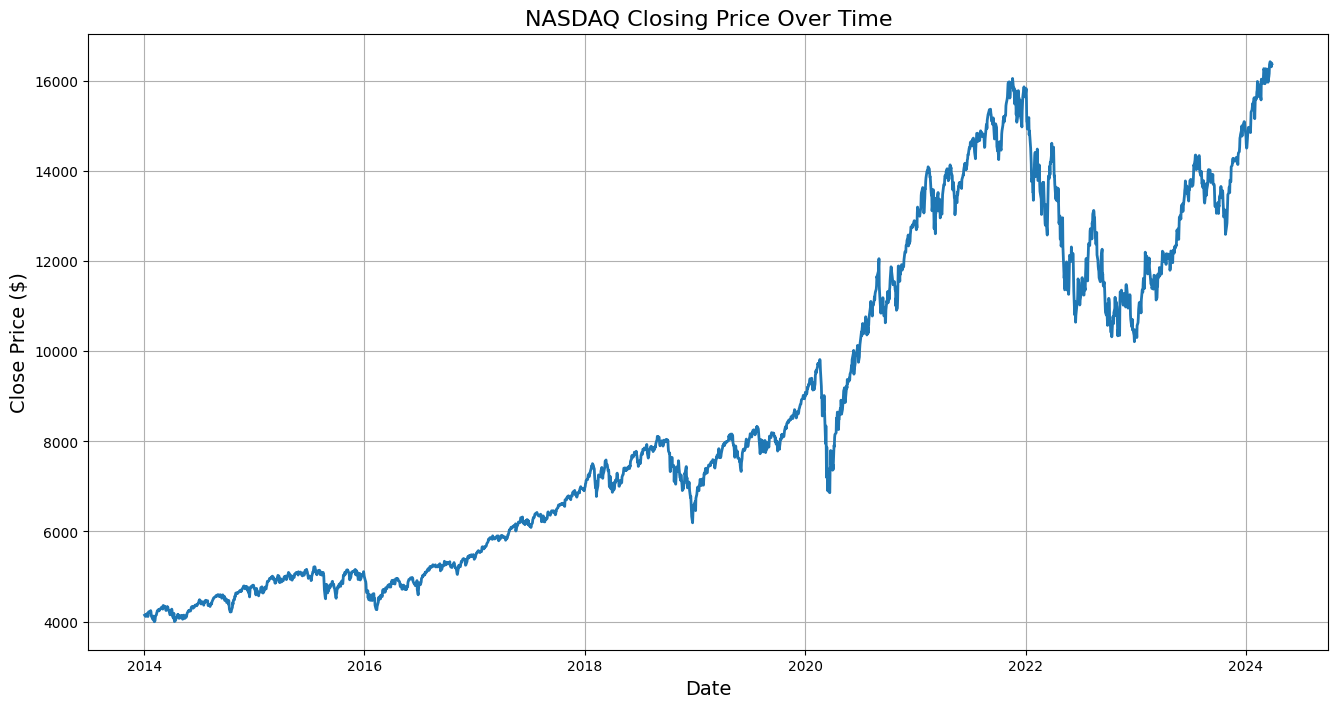

In [28]:
#Time series plot of closing prices
plt.figure(figsize = (16,8))
plt.plot(df.index, df['Close'], linewidth=2)
plt.title('NASDAQ Closing Price Over Time', fontsize = 16)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Close Price ($)', fontsize = 14)
plt.grid(True)
plt.show()

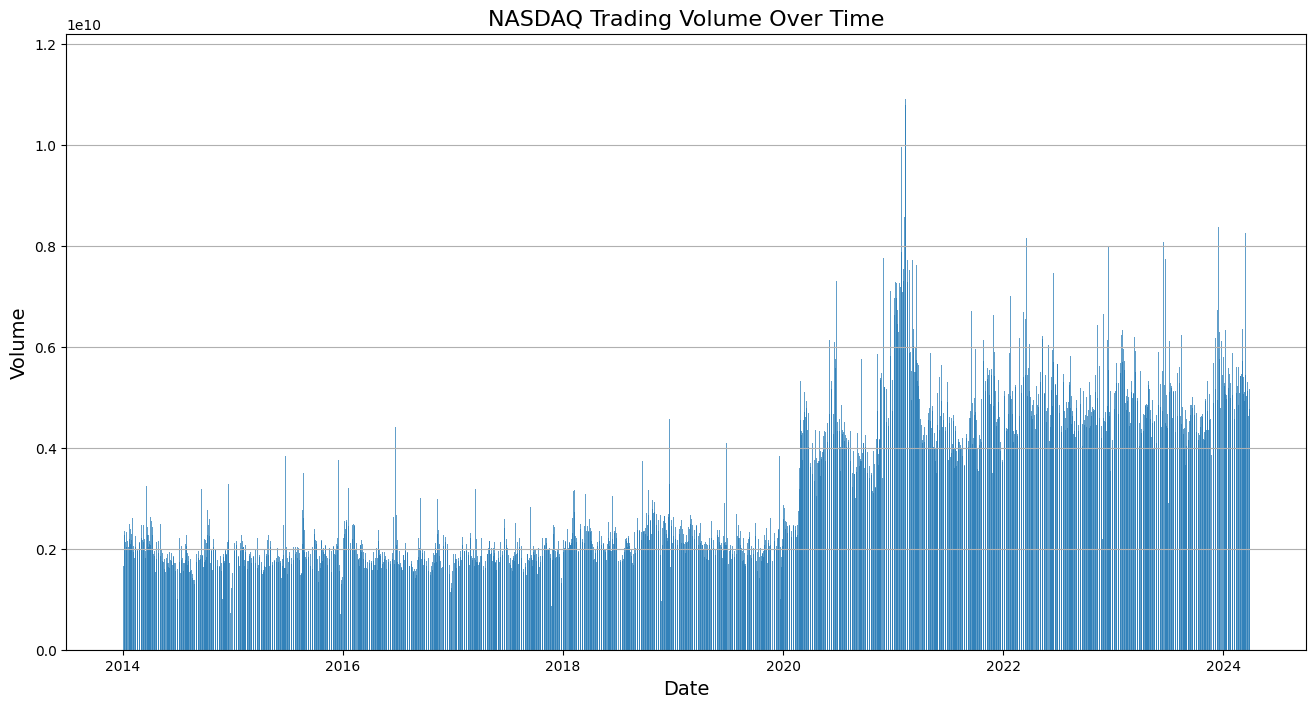

In [29]:
#Trading volume analysis
plt.figure(figsize = (16,8))
plt.bar(df.index, df['Volume'], alpha=0.7, width=2)
plt.title('NASDAQ Trading Volume Over Time', fontsize = 16)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Volume', fontsize = 14)
plt.grid(True, axis='y')
plt.show()

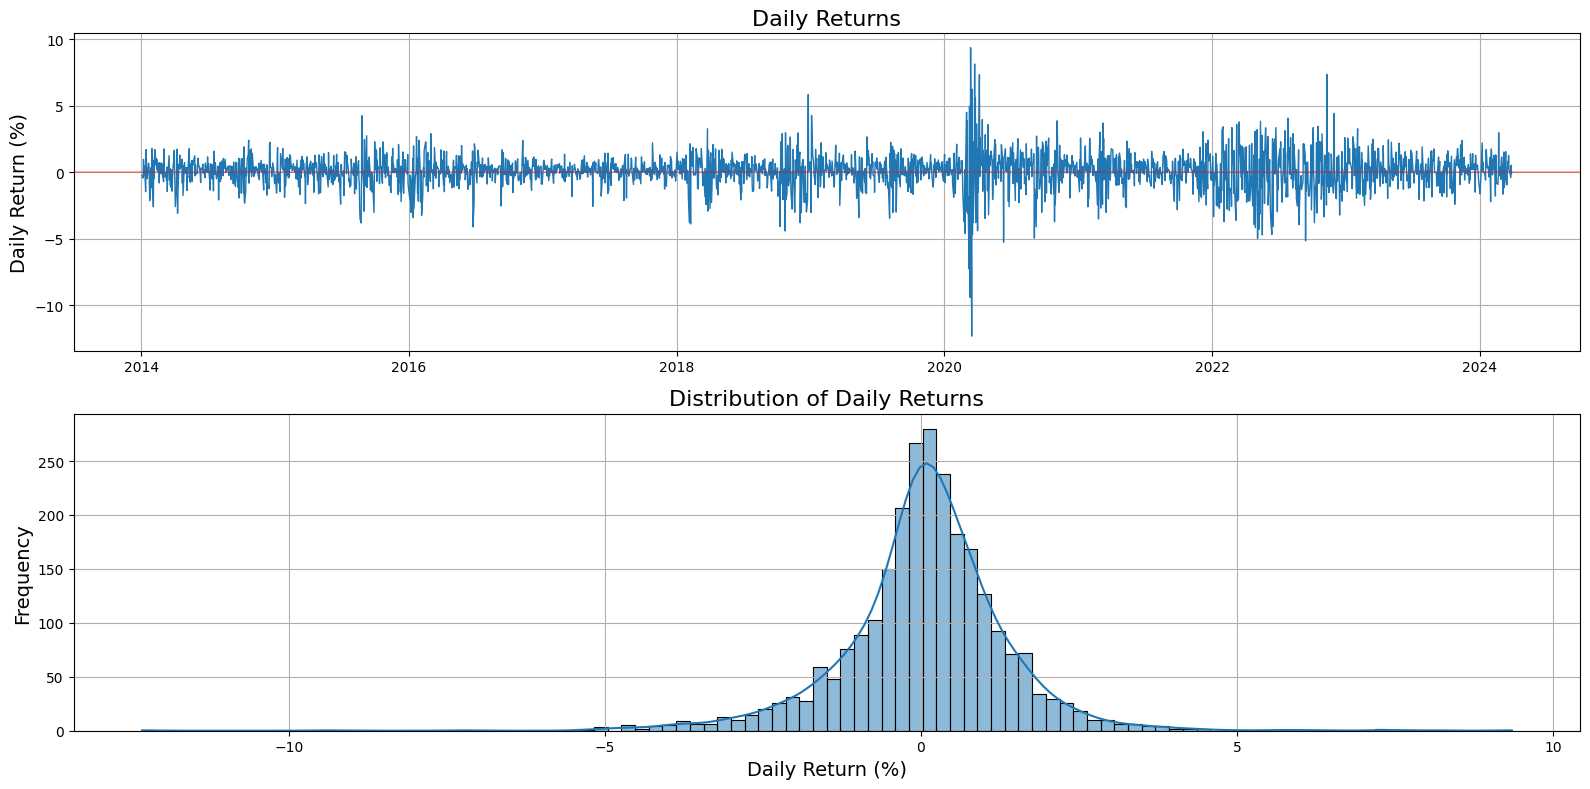

In [30]:
#Daily return calculation and distribution
df['Daily_Return'] = df['Close'].pct_change() * 100 #in percentage
plt.figure(figsize=(16,8))

#Daily return over time
plt.subplot(2,1,1)
plt.plot(df.index[1:], df['Daily_Return'][1:], linewidth=1)
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.title('Daily Returns', fontsize = 16)
plt.ylabel('Daily Return (%)', fontsize = 14)
plt.grid(True)

#Distribution of daily returns
plt.subplot(2,1,2)
sns.histplot(df['Daily_Return'].dropna(), kde=True, bins=100)
plt.title('Distribution of Daily Returns', fontsize = 16)
plt.xlabel('Daily Return (%)', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.grid(True)
plt.tight_layout()
plt.show()

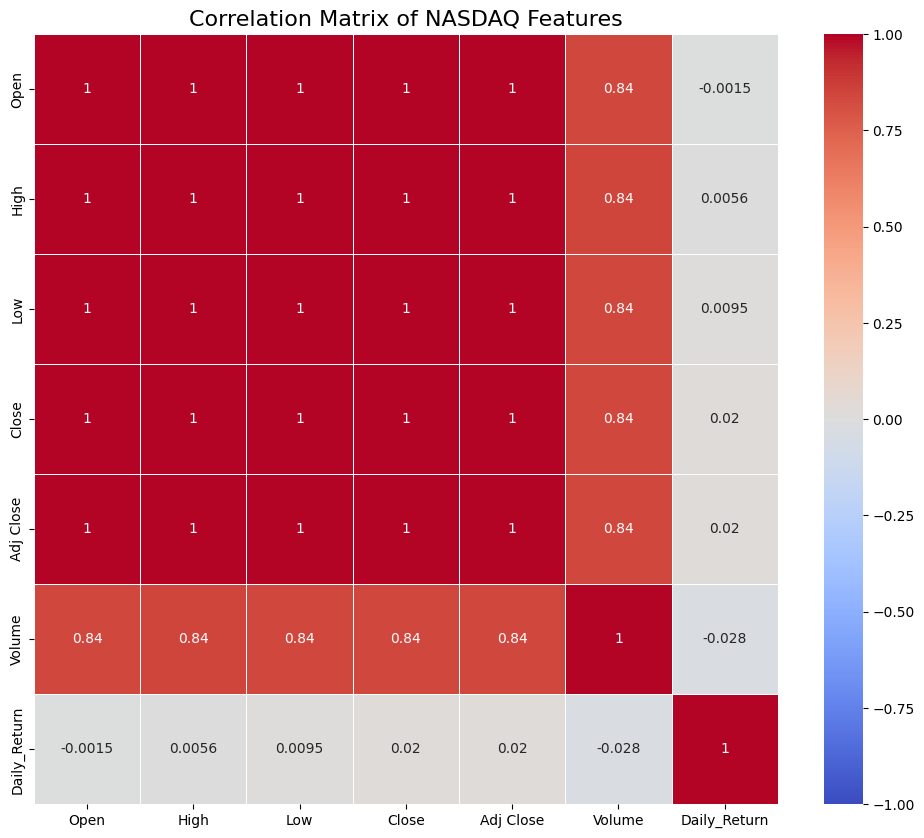

In [31]:
#Correlation matrix
plt.figure(figsize=(12, 10))
correlation = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Daily_Return']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix of NASDAQ Features', fontsize = 16)
plt.show()

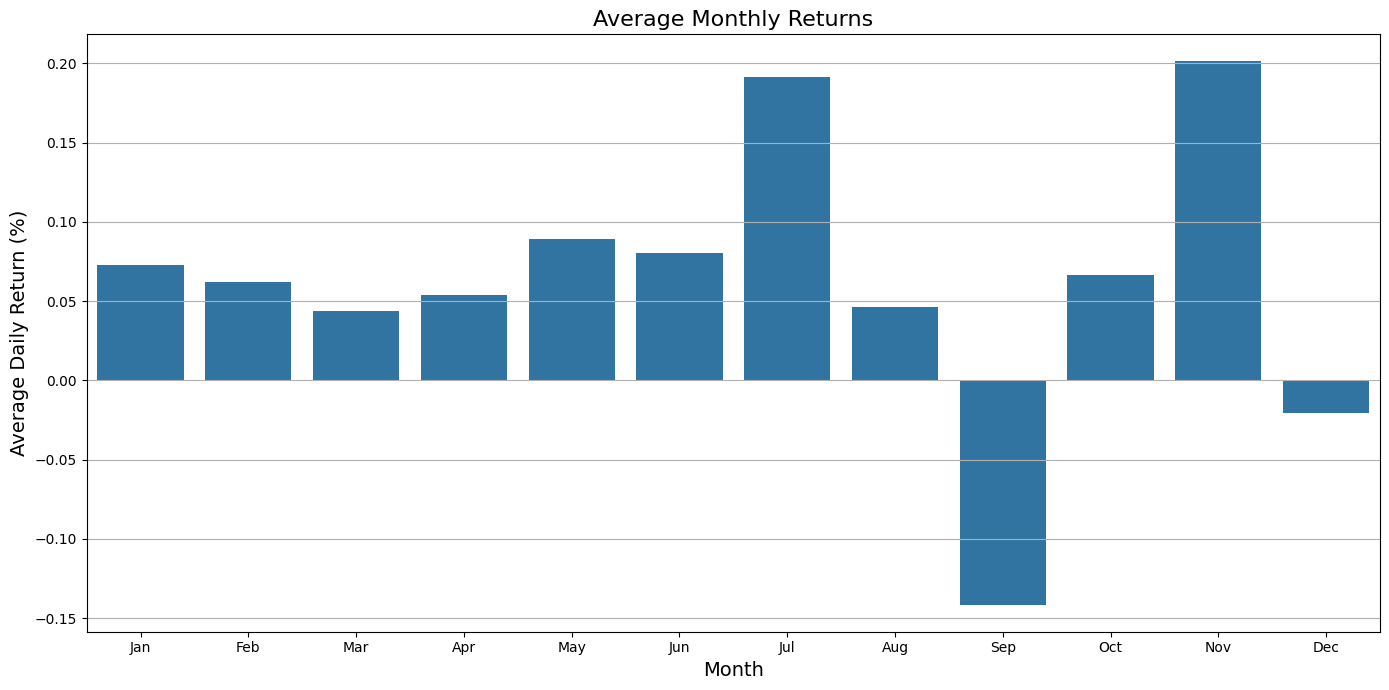

In [32]:
#Identifing seasonal patterns - average monthly returns
df['Month'] = df.index.month
df['year'] = df.index.year
monthly_returns = df.groupby('Month')['Daily_Return'].mean()

plt.figure(figsize = (14,7))
sns.barplot(x=monthly_returns.index, y=monthly_returns.values)
plt.title('Average Monthly Returns', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Daily Return (%)', fontsize=14)
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, axis = 'y')
plt.tight_layout()
plt.show()